<a href="https://colab.research.google.com/github/QwertyJacob/colab_handouts_PSI/blob/main/conteggio_2509.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 2.3 Calcolo delle probabilità degli eventi attraverso il conteggio dei esiti
___________

Addattamento da: 
- Probability for Computer Science, D. Forsyth, Springer Nature, 2018
- Probability and Statistics for Computer Scientists, M. Baron, CRC Press, 2014


Se si può calcolare la probabilità di ogni singolo esito in un evento $\mathcal{F}$, calcolare la probabilità dell'evento è semplice: Gli eventi fatti da singoli esiti -chiamati anche _singoletti_ sono eventi disgiunti, quindi è sufficiente sommare le probabilità.


Una situazione semplice per il calcolo delle probabilità è quella dei **esiti equiprobabili**.  

Cioè, quando lo spazio campionario $ \Omega $ è costituito da $ n $ esiti possibili, $ \omega_1, \ldots, \omega_n $, ciascuno con la stessa probabilità, poiché
$$
\sum_{k=1}^n P\{\omega_k\} = P\{\Omega\} = 1,
$$
in questo caso si avrà che $ P\{\omega_k\} = \frac{1}{n} $ per ogni $ k $.

Di conseguenza, la probabilità di un qualsiasi evento $ E $, costituito da $ t $ esiti, sarà uguale a:

$$
P\{E\} = \sum_{\omega_k \in E} \frac{1}{n} = t \cdot \frac{1}{n} = \frac{\text{numero di esiti in } E}{\text{numero di esiti in } \Omega}.
$$

Questa formula è spesso riassunta come:
$$
P\{E\} = \frac{|E|}{|\Omega|},
$$
dove $ |E| $ indica il numero di elementi (esiti) nell’evento $ E $, e $ |\Omega| $ è il numero totale di esiti possibili.




Gli esiti che formano l'evento $ E $ sono spesso chiamati **"favorevoli"**.  
Così otteniamo la formula:

**Esiti equiprobabili**
$$
P\{E\} = \frac{\text{numero di esiti favorevoli}}{\text{numero totale di esiti}} = \frac{N_F}{N_T}
$$

dove l'indice “$ F $” indica “favorevole” e “$ T $” indica “totale”.



**Esempio 2.21.** Lanciare un dado produce 6 esiti possibili, equiprobabili, identificati dal numero di punti da 1 a 6. Applicando la formula (2.5), otteniamo:

$$
P\{1\} = \frac{1}{6}, \quad
P\{\text{numero dispari di punti}\} = \frac{3}{6} = \frac{1}{2}, \quad
P\{\text{meno di 5}\} = \frac{4}{6} = \frac{2}{3}.
$$
♦

La soluzione, e persino la risposta a problemi di questo tipo, può dipendere dalla scelta degli esiti e dallo spazio campionario. Gli esiti devono essere definiti in modo che siano **equiprobabili**; altrimenti, la formula (2.5) non è applicabile.

---

**Esempio 2.22.** Una carta viene estratta a caso da un mazzo di 52 carte da bridge. Calcolare la probabilità che la carta estratta sia un picca.

**Prima soluzione.** Lo spazio campionario è costituito da 52 esiti equiprobabili (le carte). Tra questi, ci sono 13 esiti favorevoli (i picche). Dunque:

$$
P\{\text{picca}\} = \frac{13}{52} = \frac{1}{4}.
$$

**Seconda soluzione.** Lo spazio campionario è costituito da 4 esiti equiprobabili: i semi — fiori, quadri, cuori e picche. Uno solo è favorevole (picche). Dunque:

$$
P\{\text{picca}\} = \frac{1}{4}.
$$
♦

Le due soluzioni si basano su spazi campionari diversi. Tuttavia, in entrambi i casi, gli esiti sono stati definiti come equiprobabili, quindi la formula (2.5) è applicabile e si ottiene lo stesso risultato.



> **Esempio (bonus)**: (Numeri dispari con dadi equi) Lanciamo un dado equo (ogni numero ha la stessa probabilità) due volte, poi sommiamo i due numeri. Qual è la probabilità di ottenere un numero dispari?

*Soluzione*
Ci sono $36$ esiti (parliamo di come cadono i dadi, non del numero che sommano i due dadi). Ognuno degli esiti ha la stessa probabilità $ \frac{1}{36} $.

In diciotto di essi, quando sommiamo, otteniamo un numero dispari e gli altri diciotto danno un numero pari. Quindi la probabilità è $\frac{18}{36}= 0.5$

Il seguente codice Python genera tutte le probabilità per ogni risultato possibile.

Nota: Riesci a capire dov'è che questo codice non è ottimizzato?

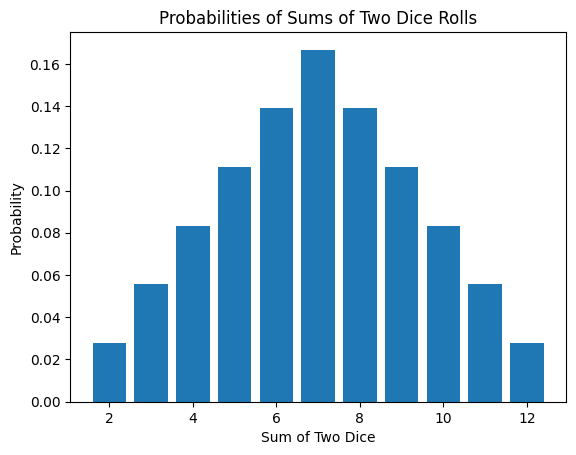

In [1]:

import matplotlib.pyplot as plt

def dice_sum_probabilities():
  """Generates a plot of the probabilities of sums of two dice rolls."""

  possible_sums = list(range(2, 13))
  probabilities = []

  for total in possible_sums:
    count = 0

    for die1 in range(1, 7):
      for die2 in range(1, 7):
        if die1 + die2 == total:
          count += 1

    probabilities.append(count / 36)

  plt.bar(possible_sums, probabilities)
  plt.xlabel("Sum of Two Dice")
  plt.ylabel("Probability")
  plt.title("Probabilities of Sums of Two Dice Rolls")
  plt.show()

dice_sum_probabilities()

L'esercizio precedente si poteva risolvere facendo i conti in modo bruttale:

In [2]:
possible_sums = list(range(2, 13))
probability_of_pair_result = 0

for total in possible_sums:
  count = 0
  if total % 2 == 0:
    for die1 in range(1, 7):
      for die2 in range(1, 7):
        if die1 + die2 == total:
          count += 1

  probability_of_pair_result += count / 36

print(probability_of_pair_result)

0.5


> **Esempio (bonus)**: (Numeri divisibili per cinque con dadi equi) Lanciamo due volte un dado equo a sei facce, poi sommiamo i due numeri. Qual è la probabilità di ottenere un numero divisibile per cinque?

**Soluzione** Ci sono 36 risultati. Ognuno di essi ha la stessa probabilità $\frac{1}{36}$. Per questo evento, i punti devono sommare o 5
o 10. Ci sono 4 modi per ottenere 5. Ci sono 3 modi per ottenere 10, quindi la probabilità è $\frac{7}{36}$.

In [3]:
7/36

0.19444444444444445

In [4]:
def probability_divisible_by_five():

  favorable_outcomes = 0
  total_outcomes = 36

  for die1 in range(1, 7):
    for die2 in range(1, 7):
      if (die1 + die2) % 5 == 0:
        favorable_outcomes += 1

  probability = favorable_outcomes / total_outcomes
  return probability

probability = probability_divisible_by_five()
print(f"The probability of obtaining a number divisible by 5 is: {probability}")

The probability of obtaining a number divisible by 5 is: 0.19444444444444445


---

**Esempio 2.23.** Una giovane famiglia prevede di avere due figli. Qual è la probabilità che entrambi siano femmine?

**Soluzione 1 (sbagliata).** Ci sono 3 possibili combinazioni per una famiglia con due figli: due femmine, due maschi, o un maschio e una femmina. Quindi, la probabilità di due femmine sarebbe $ \frac{1}{3} $.

**Soluzione 2 (corretta).** Ogni figlio ha la stessa probabilità di essere maschio o femmina (ipotizziamo $ \frac{1}{2} $), e i generi dei due figli sono indipendenti. Dunque:

$$
P\{\text{due femmine}\} = \left(\frac{1}{2}\right)\left(\frac{1}{2}\right) = \frac{1}{4}.
$$
♦

La seconda soluzione implica che lo spazio campionario consista di **quattro esiti equiprobabili**:
- due maschi (MM),
- due femmine (FF),
- primo maschio, seconda femmina (MF),
- prima femmina, secondo maschio (FM).

Ogni esito ha probabilità $ \frac{1}{4} $. Si noti che gli ultimi due esiti sono distinti: rappresentano l'ordine di nascita.

È possibile definire lo spazio campionario come nella Soluzione 1, ma in tal caso gli esiti **non sono equiprobabili**. Infatti, dalla Soluzione 2, vediamo che l’esito “un figlio per genere” ha probabilità $ \frac{1}{4} + \frac{1}{4} = \frac{1}{2} $, mentre “due maschi” o “due femmine” hanno ciascuno probabilità $ \frac{1}{4} $.  
È quindi un errore applicare la formula (2.5) a uno spazio con esiti non equiprobabili.

---

> **Esempio (bonus):** Una coppia decide di avere dei figli. Decidono semplicemente di avere tre figli. Si supponga che si verifichino tre nascite, che da ogni nascita nasca un bambino unicamente, e che i maschi e le femmine abbiano la stessa probabilità ad ogni nascita. Sia $\mathcal{B}_i$ è l'evento in cui ci sono $i$ bambini e $\mathcal{C}$ è l'evento in cui ci sono più bambine che bambini. Calcolare $P(\mathcal{B}_1)$ e $P(\mathcal{C})$.

*Soluzione*

Ci sono otto esiti. Ognuno di essi ha la stessa probabilità. Tre di essi hanno un solo ragazzo, quindi $P(\mathcal{B}_1)=\frac38$, mentre quattro di questi esiti hanno più ragazze che ragazzi, quindi $P(\mathcal{C})=\frac12$.

In [5]:
import itertools

possible_outcomes = list(itertools.product(['B', 'G'], repeat=3))

print("All possible outcomes:")
for idx, outcome in enumerate(possible_outcomes):
    print(idx+1, outcome)

num_outcomes = len(possible_outcomes)
print(f"Number of possible outcomes: {num_outcomes}")

All possible outcomes:
1 ('B', 'B', 'B')
2 ('B', 'B', 'G')
3 ('B', 'G', 'B')
4 ('B', 'G', 'G')
5 ('G', 'B', 'B')
6 ('G', 'B', 'G')
7 ('G', 'G', 'B')
8 ('G', 'G', 'G')
Number of possible outcomes: 8


In [6]:
num_boys_1 = 0
num_more_girls = 0

print("Possible outcomes with one boy:")

for outcome in possible_outcomes:
  num_boys = outcome.count('B')
  if num_boys == 1:
    num_boys_1 += 1
    print(num_boys_1, outcome)

print("Possible outcomes with more girls than boys:")
for outcome in possible_outcomes:
  if outcome.count('G') > outcome.count('B'):
    num_more_girls += 1
    print(num_more_girls, outcome)

Possible outcomes with one boy:
1 ('B', 'G', 'G')
2 ('G', 'B', 'G')
3 ('G', 'G', 'B')
Possible outcomes with more girls than boys:
1 ('B', 'G', 'G')
2 ('G', 'B', 'G')
3 ('G', 'G', 'B')
4 ('G', 'G', 'G')


In [7]:
probability_boys_1 = num_boys_1 / num_outcomes
probability_more_girls = num_more_girls / num_outcomes

print(f"P(B_1) = {probability_boys_1}")
print(f"P(C) = {probability_more_girls}")

P(B_1) = 0.375
P(C) = 0.5


## Permutazioni e disposizioni: quando "l'ordine conta".

______________

Il conteggio degli esiti di un evento può richiedere argomenti combinatori piuttosto elaborati. Una forma di argomentazione
particolarmente importante è quella di ragionare sulle **permutazioni** e sulle **combinazioni**. Si ricorda che il numero di permutazioni distinte di N elementi è $n!$

> **Permutazioni**: Quando abbiamo N elementi distinti e vogliamo *ordinarli* *in tutti i modi possibili*, stiamo calcolando le **permutazioni**. Il risultato è $n!$.

> Esempio: Si estrae una mano di sette carte da un mazzo di carte standard correttamente mescolato. Con quale probabilità vengono estratte le carte 2,3,4,...,8 di cuori (in quell'ordine)?

*Soluzione* Useremo le permutazioni per risolvere questo esericizio. Esistono $52!$ ordinamenti diversi di un mazzo di carte opportunamente mescolato. Questo è il numero totale degli esiti possibili (cioè la cardinalità dello spazio campione). Il numero di esiti dell'evento in questione invece si ottiene notando che che ogni risultato nell'evento è un ordine di carte in cui tra le prime sette carte si trova la sequenza 2,3,4,...,7,8, in quell'ordine.

Ci sono quindi $45!$ esiti nell'evento, perché è possibile riordinare le 45 carte rimanenti in modo arbitrario. Ciò significa che la
probabilità è:

$$ \frac{45!}{52!}$$

> Nota anti-confusione: Di solito, quando vogliamo calcolare il numero di ordinamenti possibili di **tutti** gli $n$ elementi di un insieme, parliamo di **permutazioni**. Invece, quando volgiamo calcolare il numero di ordinamenti di un **sottoinsieme** di elementi, come nell'esercizio precedente, parliamo di **disposizioni**.

Per quello, la formula che ci aiuterà a calcolare il numero di ordinamenti di $k$ elementi presi da un insieme di $n$ elementi si dennota con $D_{n,k}$, ed è chiamata "*numero di disposizioni semplici di classe $k$ di $n$ elementi diversi*":

$$ D_{n,k} = \frac{n!}{(n-k)!} $$

Non ci confondiamo con le diciture. Parliamo di numero di *disposizioni* perché l'ordine conta. Teniamo in conto che, presi i $k$ elementi, ne rimangono $n-K$. Questo vuol dire che **non stiamo reinserendo gli elementi che prendiamo.** In letteratura, questo modo di contare -cioè senza reinserimento- viene chiamato *semplice*, per questo si parla di numero di *disposizioni semplici*.

Nell'esempio precedente, reinserire le carte ogni volta e miscolare il mazzo di carte porterebbe ad un altra probabilità. Cioè se facciamo sette estrazioni con reinserimento, ad ogni estrazione abbiamo sempre 52 esiti diversi, il che vuol dire che gli esiti possibili per la sequenza di 7 estazioni con reinserimento è $52^7$. Di queste, quante corrispondono alla sequenza 2,3,4,5,6,7,8 di cuori in quell'ordine? Una. Quindi la probabilità è $\frac{1}{52^7}$. Si poteva arrivare a questa risposta anche sapendo che la probabiiltà di estrarre una certa carta dal mazzo è sempre $\frac{1}{52}$ quando c'è reinserimento, per qualsiasi carta, e sapendo che ogni estrazione è un evento indipendente dalle altre estrazioni, ma ne parleremo più avanti nel corso... Per ora ci basta ricordare che:

> Il numero di disposizioni con reinserimento di classe $k$ di $n$ elementi diversi è:

$$ D_{n,k} = n^k$$

Faciamo attenzione al fatto che, per questa e per la formula precedente, abbiamo detto "$n$ elementi *diversi*". Per ora non facciamo nessun controesempio né diciamo perché è importante questa clausola, ma più avanti verrà fuori tutto questo. Per ora ci basti dare importanza al fatto che queste formule valgono quando gli $n$ oggetti sono, infatti, diversi.


> **Ricorda**: Quado parliamo di **disposizioni** di elementi **senza reinserimento **nell'insieme di partenza, parliamo di **disposizioni semplici**.


> **Ricorda**: se devi contare il numero di ordinamenti, cioè se "**l'ordine conta**" allora parliamo di **disposizioni**!!!

## Combinazioni: quando "l'ordine non conta"
__________

Il numero di *combinazioni* invece è diverso dal numero di ordinamenti. Contare il numero di combinazioni equivale a contare il numero di  sottoinsiemi di una certa dimensione che possono essere formati da un insieme più grande,**senza considerare l'ordine degli elementi all'interno di ciascun sottoinsieme.**
Per essere più precisi:

> **Definizione di combinazione:** Una combinazione è una *selezione* di $k$ elementi da un insieme di $n$ elementi, dove l'ordine non importa. Cioè, due combinazioni vengono considerate diverse solo se differiscono per almeno un elemento. Se due combinazioni hanno gli stessi elementi in ordine diverso, vengono comunque considerate la stessa combinazione.

> Si indica comunemente il numero di combinazioni di classe $k$ prese da un insieme di $n$ elementi diversi con:

$ C_{n,k} = \binom{n}{k} $.

Dove $ n \choose k$ è il *coefficiente binomiale* $n$ $k$. Più specificamente abbiamo:

> Formula per le combinazioni: Il numero di combinazioni di classe $k$ prese da un insieme di $n$ elementi è dato da:

$$ C_{n,k} = \frac{n!}{k! \cdot (n-k)!} $$


Ancora una volta, ripetiamo:

- Differenza tra combinazioni e disposizioni o permutazioni:

Le permutazioni considerano l'ordine (ABC è diverso da CBA). Le combinazioni non considerano l'ordine (ABC è lo stesso di CBA).

- Interpretazione:

Contare le combinazioni equivale a contare in quanti modi possiamo selezionare $k$ oggetti da un gruppo di $n$ oggetti, dove non ci interessa l'ordine in cui vengono selezionati. È come rispondere alla domanda: "In quanti modi diversi posso formare un comitato di $k$ persone da un gruppo di n persone?"


- Connessione con i sottoinsiemi:

Ogni combinazione rappresenta un sottoinsieme di $k$ elementi dell'insieme originale di $n$ elementi. Infatti, il numero totale di sottoinsiemi di un insieme di $n$ elementi (inclusi l'insieme vuoto e l'insieme completo) è $2^n$, che è la somma di tutte le possibili combinazioni: $C_{n,0} + C_{n,1} + ... + C_{n,n}$. Puoi dimostrarlo?



> In sintesi, mentre le _permutazioni_ o _disposizioni_ contano tutti i possibili *ordinamenti*, le combinazioni contano i sottoinsiemi senza considerare l'ordine interno. Questo concetto è fondamentale in molte applicazioni, dalla teoria delle probabilità alla statistica, dalla teoria dei giochi alla crittografia.

> Trovi delle spiegazioni più "passo passo" sul sito di [YouMath](https://www.youmath.it/lezioni/probabilita/calcolo-combinatorio.html)